In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv("csgo_players.csv")
df.head()

,player_id,nickname,real_name,age,country,current_team,teams,total_kills,total_deaths,headshot_percentage,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,11893,ZywOo,Mathieu Herbaut,21,France,Vitality,"Vitality, aAa",22622,16458,41.2%,...,1474,369,71,8261,8552,1290,4262,260,49,1.32
1,7998,s1mple,Aleksandr Kostyliev,24,Ukraine,Natus Vincere,Natus Vincere,35512,26413,41.3%,...,2262,504,64,14717,13451,901,6057,199,254,1.25
2,16920,sh1ro,Dmitry Sokolov,21,Russia,Cloud9,"Gambit Youngsters, Gambit",18091,12492,27.8%,...,1075,221,30,3791,10580,550,3008,175,70,1.26
3,20113,deko,Denis Zhukov,21,Russia,1WIN,1WIN,8738,6397,36.7%,...,518,112,8,2664,4348,181,1459,86,40,1.23
4,18835,saffee,Rafael Costa,27,Brazil,FURIA,"FURIA, paiN",8482,6517,30.9%,...,524,114,14,2545,4412,264,1209,52,28,1.22


In [25]:
df.describe()

,player_id,age,total_kills,total_deaths,damage_per_round,grenade_dmg_per_round,maps_played,rounds_played,kills_per_death,kills_per_round,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,10025.051788,25.852035,15324.868064,14734.414303,75.110727,4.073243,843.347719,22172.040691,1.035487,0.688385,...,820.546239,160.884094,17.027127,9498.584464,2115.836005,840.594328,2643.271270,197.348952,65.076449,1.034488
std,4670.266229,3.697220,7616.041119,7092.810830,4.121221,1.187595,406.503953,10719.501993,0.091612,0.044627,...,428.725129,89.041086,10.830193,5615.356769,3356.026270,513.481262,1322.528164,124.400360,75.641726,0.072618
min,7.000000,17.000000,5530.000000,6166.000000,59.700000,1.400000,379.000000,9815.000000,0.740000,0.520000,...,192.000000,33.000000,0.000000,1140.000000,7.000000,105.000000,669.000000,40.000000,3.000000,0.770000
25%,7853.500000,23.000000,9222.000000,9116.000000,72.400000,3.200000,509.000000,13459.000000,0.980000,0.660000,...,483.500000,94.000000,9.000000,5474.000000,206.000000,465.500000,1608.500000,108.000000,26.500000,0.990000
50%,9766.000000,26.000000,13308.000000,12900.000000,74.900000,3.900000,738.000000,19559.000000,1.030000,0.690000,...,689.000000,136.000000,15.000000,7797.000000,583.000000,722.000000,2239.000000,164.000000,45.000000,1.030000
75%,13143.000000,28.000000,19404.000000,18366.500000,77.750000,4.800000,1073.000000,28229.000000,1.095000,0.720000,...,1044.500000,207.000000,23.000000,12665.500000,2665.500000,1097.500000,3306.000000,248.500000,75.000000,1.080000
max,20113.000000,36.000000,40979.000000,38534.000000,91.700000,9.200000,2219.000000,58263.000000,1.450000,0.860000,...,2414.000000,564.000000,71.000000,30174.000000,20663.000000,3495.000000,7496.000000,1003.000000,1001.000000,1.320000


In [26]:
df.columns

Index(['player_id', 'nickname', 'real_name', 'age', 'country', 'current_team',
       'teams', 'total_kills', 'total_deaths', 'headshot_percentage',
       'damage_per_round', 'grenade_dmg_per_round', 'maps_played',
       'rounds_played', 'kills_per_death', 'kills_per_round',
       'assists_per_round', 'deaths_per_round', 'saved_by_teammate_per_round',
       'saved_teammates_per_round', 'rounds_with_kills', 'kill_to_death_diff',
       'total_opening_kills', 'total_opening_deaths', 'opening_kill_ratio',
       'opening_kill_rating', 'team_win_percent_after_first_kill',
       'first_kill_in_won_rounds', '0_kill_rounds', '1_kill_rounds',
       '2_kill_rounds', '3_kill_rounds', '4_kill_rounds', '5_kill_rounds',
       'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills',
       'grenade_kills', 'other_kills', 'rating'],
      dtype='object')

In [27]:
features1 = ['rounds_played', 'damage_per_round', 'kills_per_death', 'kills_per_round', 'assists_per_round', 'deaths_per_round',
             '0_kill_rounds', '5_kill_rounds', 'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills', 'rating']
df1 = df[features1]
df1.head()

,rounds_played,damage_per_round,kills_per_death,kills_per_round,assists_per_round,deaths_per_round,0_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,rating
0,26803,88.0,1.37,0.84,0.12,0.61,12607,71,8261,8552,1290,4262,1.32
1,41491,86.4,1.34,0.86,0.10,0.64,18932,64,14717,13451,901,6057,1.25
2,23451,78.6,1.45,0.77,0.11,0.53,11501,30,3791,10580,550,3008,1.26
3,10913,80.4,1.37,0.80,0.10,0.59,5128,8,2664,4348,181,1459,1.23
4,10701,80.2,1.30,0.79,0.10,0.61,5213,14,2545,4412,264,1209,1.22


In [28]:
import warnings
warnings.filterwarnings("ignore")
df1['0_kill_ratio'] = df1['0_kill_rounds']/df1['rounds_played']
df1['5_kill_ratio'] = df1['5_kill_rounds']/df1['rounds_played']
df1['rifle_kills_ratio'] = df1['rifle_kills']/df1['rounds_played']
df1['sniper_kills_ratio'] = df1['sniper_kills']/df1['rounds_played']
df1['smg_kills_ratio'] = df1['smg_kills']/df1['rounds_played']
df1['pistol_kills_ratio'] = df1['pistol_kills']/df1['rounds_played']

In [29]:
features_drop = ['0_kill_rounds', '5_kill_rounds', 'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills']
df1 = df1.drop(columns=features_drop)

In [30]:
df1 = ((df1 - df1.min())/(df1.max() - df1.min())) * 9 + 1
df1.isnull().sum().sum()

0

In [31]:
df1.head()

,rounds_played,damage_per_round,kills_per_death,kills_per_round,assists_per_round,deaths_per_round,rating,0_kill_ratio,5_kill_ratio,rifle_kills_ratio,sniper_kills_ratio,smg_kills_ratio,pistol_kills_ratio
0,4.155796,8.959375,8.985915,9.470588,4.6,4.272727,10.000000,1.796818,10.000000,4.741042,6.634091,4.061223,8.266384
1,6.884330,8.509375,8.605634,10.000000,2.8,5.500000,8.854545,1.000000,6.240752,5.464773,6.724683,2.101467,7.262180
2,3.533108,6.315625,10.000000,7.617647,3.7,1.000000,9.018182,2.933694,5.346378,2.459625,8.970243,2.230390,5.896681
3,1.203971,6.821875,8.985915,8.411765,2.8,3.454545,8.527273,1.770788,3.490654,3.743215,8.037627,1.720857,6.314925
4,1.164589,6.765625,8.098592,8.147059,2.8,4.272727,8.363636,2.748108,5.444995,3.645388,8.283014,2.320718,4.718377


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Features'] = df1.columns
vif_data['VIF'] = [variance_inflation_factor(df1.values, i)
                          for i in range(len(df1.columns))]
vif_data

,Features,VIF
0,rounds_played,4.822140
1,damage_per_round,176.068422
2,kills_per_death,2032.957619
3,kills_per_round,2325.878701
4,assists_per_round,43.009488
5,deaths_per_round,933.313744
6,rating,186.151571
7,0_kill_ratio,547.451457
8,5_kill_ratio,25.608757
9,rifle_kills_ratio,3007.885032


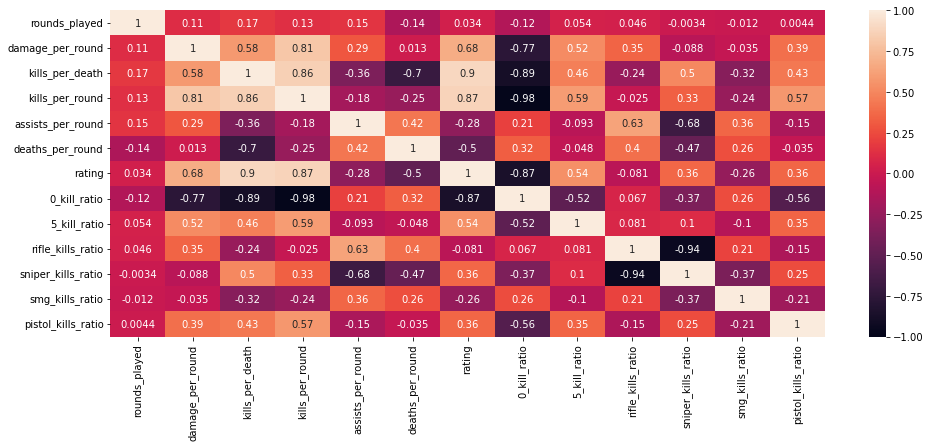

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

In [34]:
df1 = df1.drop(columns=['kills_per_round', '0_kill_ratio', 'rifle_kills_ratio', 'kills_per_death'])
vif_data = pd.DataFrame()
vif_data['Features'] = df1.columns
vif_data['VIF'] = [variance_inflation_factor(df1.values, i)
                          for i in range(len(df1.columns))]
vif_data

,Features,VIF
0,rounds_played,4.000826
1,damage_per_round,85.168607
2,assists_per_round,30.555770
3,deaths_per_round,32.240971
4,rating,66.970583
5,5_kill_ratio,22.610767
6,sniper_kills_ratio,4.495569
7,smg_kills_ratio,11.886732
8,pistol_kills_ratio,36.824932


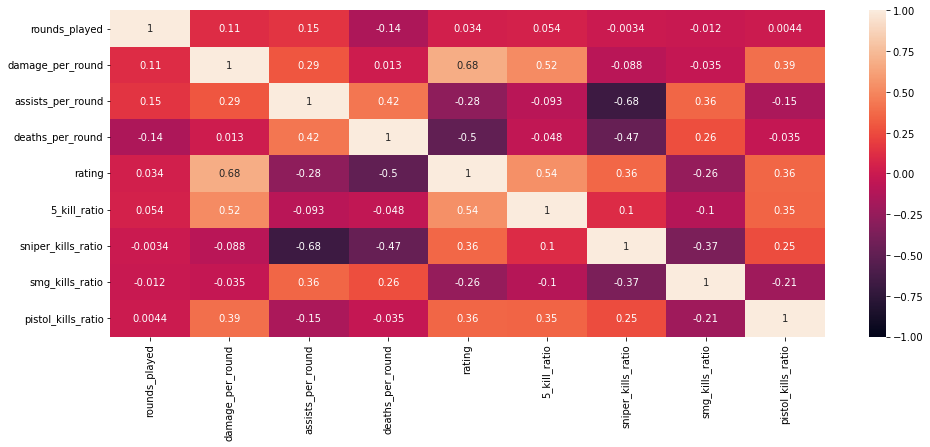

In [35]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

### K-Means Clustering

In [36]:
def init_cent(k, dataframe):
    centroids = []
    for i in range (k):
        centroid = dataframe.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [37]:
centroids = init_cent(5, df1)
centroids

,0,1,2,3,4
rounds_played,2.350706,4.826412,9.595030,2.082460,1.122791
damage_per_round,4.909375,4.262500,5.725000,7.271875,5.134375
assists_per_round,6.400000,2.800000,9.100000,5.500000,6.400000
deaths_per_round,7.545455,7.136364,5.909091,7.954545,4.681818
rating,8.527273,5.581818,6.400000,4.763636,5.418182
5_kill_ratio,4.323906,4.223902,3.109825,2.586376,2.111996
sniper_kills_ratio,1.095171,2.743712,1.292152,1.142608,1.331363
smg_kills_ratio,2.666325,3.192779,4.065146,3.338751,2.949472
pistol_kills_ratio,7.766209,5.383122,4.547658,5.557609,5.121956


In [38]:
distances = centroids.apply(lambda x: np.sqrt(((df1 - x)**2).sum(axis=1)))
distances

,0,1,2,3,4
0,10.043611,10.537402,12.875321,11.912570,12.234914
1,9.311474,7.765116,10.560423,10.177925,11.020806
2,10.977111,9.868185,12.897722,11.956528,10.532889
3,9.303781,8.573328,13.270963,9.707179,8.763232
4,9.533137,8.306071,13.258059,9.787868,9.190121
...,...,...,...,...,...
806,8.826918,7.823703,8.901101,6.489878,6.976519
807,8.869186,7.399703,10.576813,5.925347,6.044484
808,10.237118,7.155632,7.641620,8.105650,8.432543
809,10.518431,8.920038,11.653714,7.454445,7.844689


In [39]:
distances['min_dist'] = distances.idxmin(axis=1)

In [40]:
distances

,0,1,2,3,4,min_dist
0,10.043611,10.537402,12.875321,11.912570,12.234914,0
1,9.311474,7.765116,10.560423,10.177925,11.020806,1
2,10.977111,9.868185,12.897722,11.956528,10.532889,1
3,9.303781,8.573328,13.270963,9.707179,8.763232,1
4,9.533137,8.306071,13.258059,9.787868,9.190121,1
...,...,...,...,...,...,...
806,8.826918,7.823703,8.901101,6.489878,6.976519,3
807,8.869186,7.399703,10.576813,5.925347,6.044484,3
808,10.237118,7.155632,7.641620,8.105650,8.432543,1
809,10.518431,8.920038,11.653714,7.454445,7.844689,3


In [41]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df1 - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [42]:
labels = get_labels(df1, centroids)
labels.value_counts()

3    295
1    263
4    173
2     57
0     23
dtype: int64

In [43]:
new_centroids = df1.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
new_centroids

,0,1,2,3,4
rounds_played,2.454665,3.436537,7.433690,2.303410,2.011513
damage_per_round,7.213490,4.972985,5.534953,5.571634,4.630391
assists_per_round,6.201668,3.858996,7.292789,6.154846,5.802791
deaths_per_round,6.497653,5.742990,6.642392,7.505680,5.906674
rating,7.059057,5.633430,4.876089,4.943180,4.841868
5_kill_ratio,5.649713,3.676485,3.365654,3.488964,2.891777
sniper_kills_ratio,1.493977,3.884297,1.501541,1.423857,1.541102
smg_kills_ratio,3.008859,2.717239,3.230123,3.485983,3.252224
pistol_kills_ratio,6.362608,5.324626,4.937975,5.156054,4.599854


In [44]:
def new_cent(k, dataframe, labels):
    centroids = dataframe.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [46]:
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration: {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

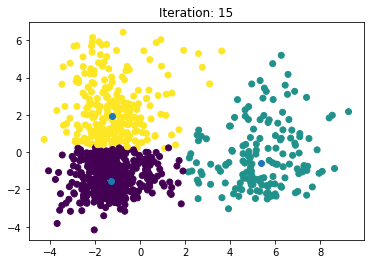

In [47]:
max_iteration = 100
k=3
old_centroids = pd.DataFrame()
centroids = init_cent(k, df1)
i=0
while i<max_iteration and not old_centroids.equals(centroids):
    old_centroids = centroids
    labels = get_labels(df1, centroids)
    centroids = new_cent(k,df1, labels)
    plot_cluster(df1, labels, centroids, i)
    i=i+1

In [48]:
centroids

,0,1,2
rounds_played,1.929777,2.590841,5.214053
damage_per_round,4.983082,5.028199,5.682067
assists_per_round,5.798881,3.180163,6.209518
deaths_per_round,6.987100,5.220627,6.463496
rating,4.762502,6.151339,5.353750
5_kill_ratio,3.253663,3.689810,3.634987
sniper_kills_ratio,1.475698,7.114393,1.548832
smg_kills_ratio,3.381143,2.360040,3.307743
pistol_kills_ratio,4.934016,5.551833,5.109458


In [49]:
from sklearn.cluster import KMeans

In [50]:
kms = KMeans(3)
kms.fit(df1)
centroids2 = kms.cluster_centers_
centroids2

array([[5.83203917, 5.73041373, 6.31971831, 6.51024328, 5.384379  ,
        3.63375774, 1.73006477, 3.43783533, 5.13900318],
       [3.00602708, 5.11838235, 3.35882353, 5.37165775, 6.22352941,
        3.82579229, 7.21786043, 2.48075632, 5.64998826],
       [2.18094484, 5.2188764 , 5.95505618, 7.04443309, 4.99309499,
        3.47520926, 1.57896834, 3.53286407, 5.06896867]])

In [51]:
centroids2_df = pd.DataFrame(centroids2, columns=centroids.index).T
centroids2_df

,0,1,2
rounds_played,5.832039,3.006027,2.180945
damage_per_round,5.730414,5.118382,5.218876
assists_per_round,6.319718,3.358824,5.955056
deaths_per_round,6.510243,5.371658,7.044433
rating,5.384379,6.223529,4.993095
5_kill_ratio,3.633758,3.825792,3.475209
sniper_kills_ratio,1.730065,7.217860,1.578968
smg_kills_ratio,3.437835,2.480756,3.532864
pistol_kills_ratio,5.139003,5.649988,5.068969


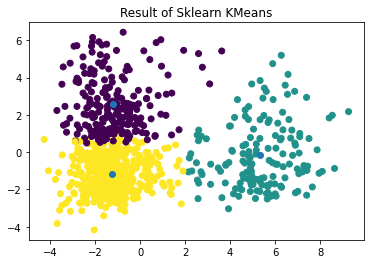

In [52]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df1)
centroids_2d = pca.transform(centroids2_df.T)
labels = get_labels(df1, centroids2_df)
plt.title('Result of Sklearn KMeans')
plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
plt.show()

In [53]:
k_list = [1, 2, 3, 4, 5]
sq_dist_list = np.array([])
for k in k_list:
    kms = KMeans(k)
    kms.fit(df1)
    sq_dist = kms.inertia_
    sq_dist_list = np.append(sq_dist_list, sq_dist)

In [54]:
sq_dist_list

array([15796.69908433, 10315.46361035,  8319.60435301,  7359.82470519,
        6957.49979965])

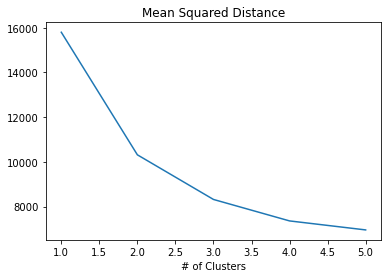

In [55]:
plt.title('Mean Squared Distance')
plt.xlabel('# of Clusters')
plt.plot(k_list, sq_dist_list)
plt.show()

### DBSCAN Clustering

In [56]:
from sklearn.cluster import DBSCAN

In [57]:
dbs = DBSCAN(eps=2.05, min_samples=5)
dbs.fit(df1)
labels2 = dbs.labels_
print(labels2)
print(len(labels2))

[-1 -1 -1 -1 -1  0  0  0  0 -1 -1 -1 -1  0 -1  1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0 -1  2  0  0  1 -1  1 -1  1  0 -1 -1  0 -1  1  0  0  0  1  1 -1 -1
  1  0 -1  1  0 -1  2  1 -1 -1 -1 -1 -1 -1  1  1  0  1 -1  1  1  1  1  2
  1  0  0 -1  1  1  1  1  1 -1  1  1  1  0  1 -1  1 -1  1  1  0  1 -1  1
 -1 -1  1  1  0 -1  1  1  1 -1 -1  0  1  1 -1  0 -1  1  0  1  0  0  1  1
 -1  1  1 -1 -1  0 -1  0 -1  1  0  2  1  1 -1 -1 -1  1  1  1  1 -1  1  1
  1  1  1  1 -1  2  1  1 -1  1  1  1  1  1  1  1 -1 -1  0  1  1  1 -1  0
  1  1  0 -1  1  1 -1  1  1 -1  0 -1  1  1 -1  1  1 -1  1 -1  1  0  1  0
  1  0  1 -1  1  2  1 -1  1  1  1  1  1  1  1  1  0  1  1  0  0  1  1  1
  1  1  0  1  2  0  1 -1  1  1  1  1 -1  1  1  0  0 -1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  0 -1  0  1  1  1  0  0  1  1  1  0  1  1  1 -1  1
  1  1  1  1  1  1  1  0  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1
  1  1  1  0  1  1  1  1  1  0 -1  1  1  1  1  1  1

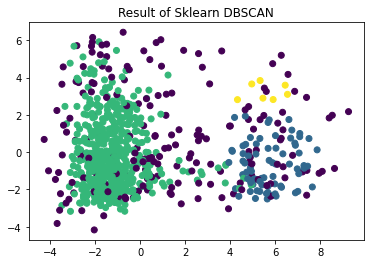

In [58]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df1)
plt.title('Result of Sklearn DBSCAN')
plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels2)
plt.show()

In [59]:
df1.head()

,rounds_played,damage_per_round,assists_per_round,deaths_per_round,rating,5_kill_ratio,sniper_kills_ratio,smg_kills_ratio,pistol_kills_ratio
0,4.155796,8.959375,4.6,4.272727,10.000000,10.000000,6.634091,4.061223,8.266384
1,6.884330,8.509375,2.8,5.500000,8.854545,6.240752,6.724683,2.101467,7.262180
2,3.533108,6.315625,3.7,1.000000,9.018182,5.346378,8.970243,2.230390,5.896681
3,1.203971,6.821875,2.8,3.454545,8.527273,3.490654,8.037627,1.720857,6.314925
4,1.164589,6.765625,2.8,4.272727,8.363636,5.444995,8.283014,2.320718,4.718377


In [60]:
import math
def get_dist(df, a, b):
    length = len(df.columns)
    dist_sq = 0
    for i in range(0, length):
        dist_sq = dist_sq + (df.iloc[a, i]-df.iloc[b, i])**2
    return (math.sqrt(dist_sq))

print(get_dist(df1, 0, 2))

7.479512993657794


In [61]:
def neighbors_count(df, i, eps):
    length = len(df)
    count = 0
    for k in range(0, length):
        if (k==i):
            continue
        if get_dist(df, i, k)<=eps:
            count = count+1
    return count

In [62]:
def get_neighbors(df, i, k, labels, eps, min_samples):
    outer_index = list()
    outer_index = [i]
    length_df = len(df)
    length = len(outer_index)
    while (length>0):
        a = outer_index.pop(0)
        neighbor_list = list()
        for n in range(0, length_df):
            if (np.isnan(labels)[n] and get_dist(df, n, a)<=eps and n!=a):
                neighbor_list.append(n)
        if (len(neighbor_list)>=(min_samples-1)):
            outer_index = outer_index + neighbor_list
            for j in neighbor_list:
                labels[j]=k
        length = len(outer_index)
    return labels


def get_dbs_labels(df, eps, min_samples):
    length = len(df)
    labels = np.empty(length)
    labels[:] = np.NaN
    k=0  # number of cluster
    n=0  # number of points
    while (True in np.isnan(labels)):
        for i in range(0, length):
            if (np.isnan(labels)[i]):
                labels[i]=k
                labels = get_neighbors(df, i, k, labels, eps, min_samples)
                k=k+1
    return labels
   

In [63]:
labels3 = get_dbs_labels(df1, 2.05, 5)
print(labels3)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  47.  53.  54.
  55.  56.  53.  47.  57.  58.  47.  59.  60.  47.  47.  47.  53.  61.
  62.  63.  53.  64.  65.  53.  47.  66.  67.  53.  68.  69.  70.  71.
  72.  73.  53.  53.  47.  53.  74.  53.  75.  76.  77.  67.  78.  47.
  79.  80.  53.  81.  82.  53.  53.  83.  84.  53.  53.  47.  85.  86.
  87.  88.  53.  53.  89.  90.  91.  53.  92.  93.  53.  53.  94.  95.
  96.  53.  53.  97.  98.  99.  53.  53. 100.  47. 101. 102. 103. 104.
 105.  47. 106. 107. 108.  53.  53. 109. 110.  47. 111. 112. 113.  53.
 114.  67.  53. 115. 116. 117. 118.  53.  53.  53. 119. 120.  53.  53.
  53.  53.  53.  53. 121. 122.  53.  53. 123. 124.  53.  53.  53. 125.
  53. 126. 127. 128. 129.  53.  53.  53. 130. 131.  53.  53. 129. 132.
  53. 

In [64]:
print(np.array(np.unique(labels3, return_counts=True)).T)

[[  0.   1.]
 [  1.   1.]
 [  2.   1.]
 [  3.   1.]
 [  4.   1.]
 [  5.   1.]
 [  6.   1.]
 [  7.   1.]
 [  8.   1.]
 [  9.   1.]
 [ 10.   1.]
 [ 11.   1.]
 [ 12.   1.]
 [ 13.   1.]
 [ 14.   1.]
 [ 15.   1.]
 [ 16.   1.]
 [ 17.   1.]
 [ 18.   1.]
 [ 19.   1.]
 [ 20.   1.]
 [ 21.   1.]
 [ 22.   1.]
 [ 23.   1.]
 [ 24.   1.]
 [ 25.   1.]
 [ 26.   1.]
 [ 27.   1.]
 [ 28.   1.]
 [ 29.   1.]
 [ 30.   1.]
 [ 31.   1.]
 [ 32.   1.]
 [ 33.   1.]
 [ 34.   1.]
 [ 35.   1.]
 [ 36.   1.]
 [ 37.   1.]
 [ 38.   1.]
 [ 39.   1.]
 [ 40.   1.]
 [ 41.   1.]
 [ 42.   1.]
 [ 43.   1.]
 [ 44.   1.]
 [ 45.   1.]
 [ 46.   1.]
 [ 47.  14.]
 [ 48.   1.]
 [ 49.   1.]
 [ 50.   1.]
 [ 51.   1.]
 [ 52.   1.]
 [ 53. 420.]
 [ 54.   1.]
 [ 55.   1.]
 [ 56.   1.]
 [ 57.   1.]
 [ 58.   1.]
 [ 59.   1.]
 [ 60.   1.]
 [ 61.   1.]
 [ 62.   1.]
 [ 63.   1.]
 [ 64.   1.]
 [ 65.   1.]
 [ 66.   1.]
 [ 67.   5.]
 [ 68.   1.]
 [ 69.   1.]
 [ 70.   1.]
 [ 71.   1.]
 [ 72.   1.]
 [ 73.   1.]
 [ 74.   1.]
 [ 75.   1.]
 [ 76.   1.]

In [65]:
for i in range(0, len(labels3)):
    if (labels3[i]!=47 and labels3[i]!=53 and labels3[i]!=67 and labels3[i]!=129 and labels3[i]!=167):
        labels3[i]=0
print(np.array(np.unique(labels3, return_counts=True)).T)

[[  0. 344.]
 [ 47.  14.]
 [ 53. 420.]
 [ 67.   5.]
 [129.  23.]
 [167.   5.]]


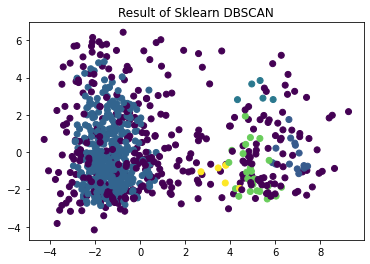

In [66]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df1)
plt.title('Result of Sklearn DBSCAN')
plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels3)
plt.show()

In [67]:
from sklearn import cluster, datasets, mixture
noisy_circles = datasets.make_circles(n_samples=500, factor=0.5, noise=0.05)

In [68]:
df2 = pd.DataFrame(noisy_circles[0], columns=['x', 'y'])
df2

,x,y
0,-0.431391,-0.851978
1,0.231156,-0.542910
2,0.271102,-0.416866
3,0.285658,0.388709
4,-0.881377,0.233068
...,...,...
495,-0.204380,0.950986
496,-0.301365,-0.406498
497,-0.362758,-0.258425
498,-0.427136,0.245499


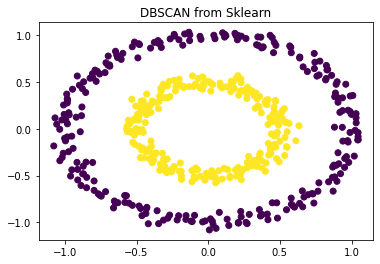

In [89]:
dbs2 = DBSCAN(eps=0.2, min_samples=5)
dbs2.fit(df2)
labels4 = dbs2.labels_
plt.title('DBSCAN from Sklearn')
plt.scatter(df2.x, df2.y, c=labels4)
plt.show()

In [91]:
labels5 = get_dbs_labels(df2, 0.2, 5)

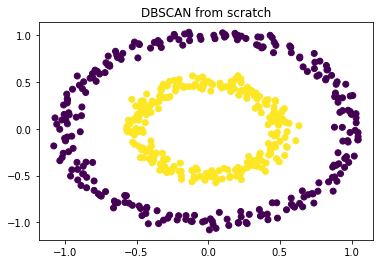

In [92]:
plt.title('DBSCAN from scratch')
plt.scatter(df2.x, df2.y, c=labels5)
plt.show()